# **Best models**

In [ ]:
!pip install tensorflow --quiet
!pip install yfinance   --quiet

import math as mt
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from tensorflow import keras
from seaborn import set_style
from sklearn.preprocessing import MinMaxScaler

set_style("darkgrid")

In [ ]:
start_date = "2020-06-24"
end_date   = "2023-06-24"

apple_ticker  = "AAPL"
smsg_ticker   = "005930.KS" # Ticker symbol for Samsung on Korea Stock Exchange (KS)

amazon_ticker = "AMZN"
baba_ticker   = "BABA"  # Ticker symbol for Alibaba Group on NYSE

AAPL = yf.download(apple_ticker, start=start_date, end=end_date)
SMSG = yf.download(smsg_ticker, start=start_date, end=end_date)

AMZN = yf.download(amazon_ticker, start=start_date, end=end_date)
BABA = yf.download(baba_ticker, start=start_date, end=end_date)

AAPL.index = pd.to_datetime(AAPL.index)
AMZN.index = pd.to_datetime(AMZN.index)
BABA.index = pd.to_datetime(BABA.index)
SMSG.index = pd.to_datetime(SMSG.index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL['AAPL Close']  = AAPL['Close']

# SK WON to USD (08-07-2023):
WON_USD = 0.000770
SMSG['SMSG Close']  = SMSG['Close'] * WON_USD

AAPL = AAPL.drop(['Open','High','Low','Close','Adj Close','Volume'], axis=1)
SMSG = SMSG.drop(['Open','High','Low','Close','Adj Close','Volume'], axis=1)

AMZN['AMZN Close']  = AMZN['Close']
BABA['BABA Close']  = BABA['Close']

AMZN = AMZN.drop(['Open','High','Low','Close','Adj Close','Volume'], axis=1)
BABA = BABA.drop(['Open','High','Low','Close','Adj Close','Volume'], axis=1)

############################################### MULTIVARIATE ###############################################
# Merge the two DataFrames based on 'Date' column
AAPL_SMSG = pd.merge(AAPL, SMSG, on='Date', how='inner')
AMZN_BABA = pd.merge(AMZN, BABA, on='Date', how='inner')
############################################################################################################

In [ ]:
AAPL.head()

,AAPL Close
Date,
2020-06-24,90.014999
2020-06-25,91.209999
2020-06-26,88.407501
2020-06-29,90.445000
2020-06-30,91.199997


In [ ]:
AAPL_SMSG.head()

,AAPL Close,SMSG Close
Date,,
2020-06-24,90.014999,40.733
2020-06-25,91.209999,39.963
2020-06-26,88.407501,41.041
2020-06-29,90.445000,40.348
2020-06-30,91.199997,40.656


In [ ]:
AMZN.head()

,AMZN Close
Date,
2020-06-24,136.720001
2020-06-25,137.729004
2020-06-26,134.643494
2020-06-29,134.018997
2020-06-30,137.940994


In [ ]:
AMZN_BABA.head()

,AMZN Close,BABA Close
Date,,
2020-06-24,136.720001,226.220001
2020-06-25,137.729004,222.160004
2020-06-26,134.643494,215.710007
2020-06-29,134.018997,215.020004
2020-06-30,137.940994,215.699997


In [ ]:
T = 21

################################################ UNIVARIATE ################################################
AAPL_returns = AAPL['AAPL Close'] - AAPL['AAPL Close'].shift(T)
AMZN_returns = AMZN['AMZN Close'] - AMZN['AMZN Close'].shift(T)

AAPL['Ret'] = AAPL_returns
AMZN['Ret'] = AMZN_returns

AAPL = AAPL.iloc[T:]
AMZN = AMZN.iloc[T:]

window_size = 7
AAPL_MA = AAPL['Ret'].rolling(window=window_size).mean()
AMZN_MA = AMZN['Ret'].rolling(window=window_size).mean()

# Drop missing values from the moving average series
AAPL_MA = AAPL_MA.dropna()
AMZN_MA = AMZN_MA.dropna()
############################################################################################################

############################################### MULTIVARIATE ###############################################
AAPL_returns = AAPL_SMSG['AAPL Close'] - AAPL_SMSG['AAPL Close'].shift(T)
SMSG_returns = AAPL_SMSG['SMSG Close'] - AAPL_SMSG['SMSG Close'].shift(T)

AMZN_returns = AMZN_BABA['AMZN Close'] - AMZN_BABA['AMZN Close'].shift(T)
BABA_returns = AMZN_BABA['BABA Close'] - AMZN_BABA['BABA Close'].shift(T)

AAPL_SMSG = AAPL_SMSG.iloc[T:]
AAPL_SMSG.loc[:, 'AAPL Ret'] = AAPL_returns.iloc[T:].values
AAPL_SMSG.loc[:, 'SMSG Ret'] = SMSG_returns.iloc[T:].values

AMZN_BABA = AMZN_BABA.iloc[T:]
AMZN_BABA.loc[:, 'AMZN Ret'] = AMZN_returns.iloc[T:].values
AMZN_BABA.loc[:, 'BABA Ret'] = BABA_returns.iloc[T:].values

AAPL_SMSG = AAPL_SMSG.drop(['SMSG Close'], axis=1)
AMZN_BABA = AMZN_BABA.drop(['BABA Close'], axis=1)

AAPL_SMSG['AAPL Ret'] = AAPL_SMSG['AAPL Ret'].rolling(window=window_size).mean()
AAPL_SMSG['SMSG Ret'] = AAPL_SMSG['SMSG Ret'].rolling(window=window_size).mean()
AMZN_BABA['AMZN Ret'] = AMZN_BABA['AMZN Ret'].rolling(window=window_size).mean()
AMZN_BABA['BABA Ret'] = AMZN_BABA['BABA Ret'].rolling(window=window_size).mean()

AAPL_SMSG = AAPL_SMSG.dropna()
AMZN_BABA = AMZN_BABA.dropna()
############################################################################################################

<ipython-input-8-1eb8c04f23d2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_SMSG.loc[:, 'AAPL Ret'] = AAPL_returns.iloc[T:].values
<ipython-input-8-1eb8c04f23d2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_SMSG.loc[:, 'SMSG Ret'] = SMSG_returns.iloc[T:].values
<ipython-input-8-1eb8c04f23d2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

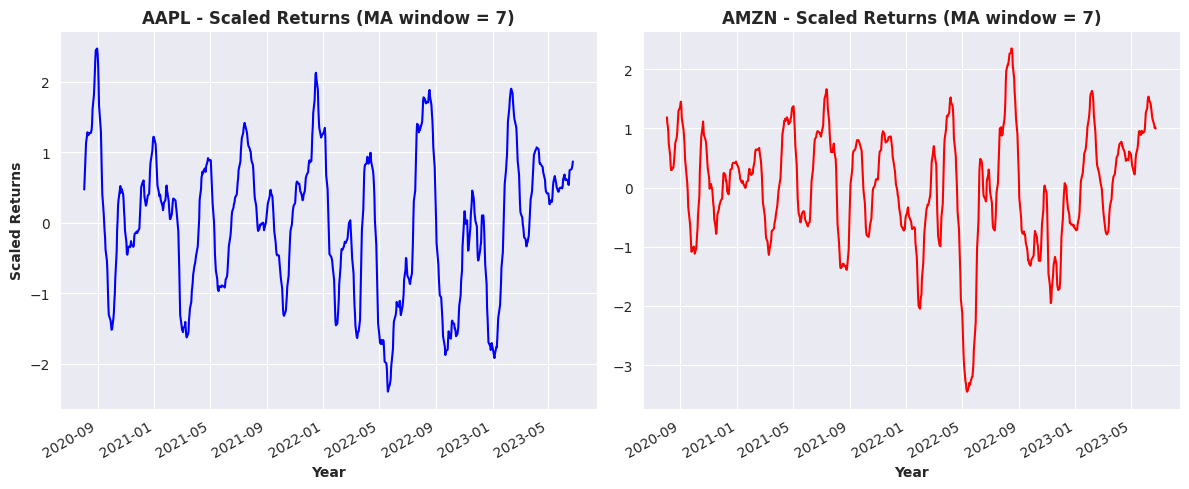

In [ ]:
################################################ UNIVARIATE ################################################
from scipy import stats

AAPL_mean_MA     = AAPL_MA.mean()
AAPL_variance_MA = AAPL_MA.var()
AAPL_std_MA      = AAPL_MA.std()
AMZN_mean_MA     = AMZN_MA.mean()
AMZN_variance_MA = AMZN_MA.var()
AMZN_std_MA      = AMZN_MA.std()

# Zscore normalization
AAPL_scaled = stats.zscore(AAPL_MA)
AMZN_scaled = stats.zscore(AMZN_MA)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title('AAPL - Scaled Returns (MA window = ' + str(window_size) + ')', fontweight='bold')
AAPL_scaled.plot(ax=axes[0], color='blue')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Scaled Returns', fontweight='bold')

axes[1].set_title('AMZN - Scaled Returns (MA window = ' + str(window_size) + ')', fontweight='bold')
AMZN_scaled.plot(ax=axes[1], color='red')
axes[1].set_xlabel('Year', fontweight='bold')

plt.tight_layout()
plt.show()
############################################################################################################

In [ ]:
############################################### MULTIVARIATE ###############################################
from sklearn.preprocessing import MinMaxScaler

AAPL_SMSG_scaled = pd.DataFrame(index=AAPL_SMSG.index)
AMZN_BABA_scaled = pd.DataFrame(index=AMZN_BABA.index)

# Close Price
AAPL_Close_scaler = MinMaxScaler()
AMZN_Close_scaler = MinMaxScaler()

AAPL_close_prices = AAPL_SMSG['AAPL Close'].values.reshape(-1, 1)
AMZN_close_prices = AMZN_BABA['AMZN Close'].values.reshape(-1, 1)

AAPL_Close_scaler.fit(AAPL_close_prices)
AMZN_Close_scaler.fit(AMZN_close_prices)

AAPL_SMSG_scaled['AAPL Close'] = AAPL_Close_scaler.transform(AAPL_close_prices)
AMZN_BABA_scaled['AMZN Close'] = AMZN_Close_scaler.transform(AMZN_close_prices)


# Returns
AAPL_Return_scaler = MinMaxScaler()
SMSG_Return_scaler = MinMaxScaler()
AMZN_Return_scaler = MinMaxScaler()
BABA_Return_scaler = MinMaxScaler()

AAPL_return = AAPL_SMSG['AAPL Ret'].values.reshape(-1, 1)
SMSG_return = AAPL_SMSG['SMSG Ret'].values.reshape(-1, 1)
AMZN_return = AMZN_BABA['AMZN Ret'].values.reshape(-1, 1)
BABA_return = AMZN_BABA['BABA Ret'].values.reshape(-1, 1)

AAPL_Return_scaler.fit(AAPL_return)
SMSG_Return_scaler.fit(SMSG_return)
AMZN_Return_scaler.fit(AMZN_return)
BABA_Return_scaler.fit(BABA_return)

AAPL_SMSG_scaled['AAPL Ret'] = AAPL_Return_scaler.transform(AAPL_return)
AAPL_SMSG_scaled['SMSG Ret'] = SMSG_Return_scaler.transform(SMSG_return)
AMZN_BABA_scaled['AMZN Ret'] = AMZN_Return_scaler.transform(AMZN_return)
AMZN_BABA_scaled['BABA Ret'] = BABA_Return_scaler.transform(BABA_return)
############################################################################################################

In [ ]:
################################################ UNIVARIATE ################################################
def create_dataset_UNI(dataset, lookback):
    X_train = []
    Y_train = []

    for i in range(lookback, len(dataset)):
        X_train.append(dataset[i-lookback:i])
        Y_train.append(dataset[i])

    return np.array(X_train), np.array(Y_train)
############################################################################################################

In [ ]:
############################################### MULTIVARIATE ###############################################

def create_dataset_MUL(dataset, lookback, column):
    X_train = []
    Y_train = []

    for i in range(lookback, len(dataset)):
        X_train.append(dataset.iloc[i-lookback:i, dataset.columns != 'Data'].values)
        Y_train.append(dataset[column].iloc[i])

    return np.array(X_train), np.array(Y_train)
############################################################################################################

In [ ]:
################################################ UNIVARIATE ################################################
AAPL_train_size = int(len(AAPL_scaled) * 0.7)
AAPL_val_size   = int(len(AAPL_scaled) * 0.2)
AAPL_train_data = AAPL_scaled[:AAPL_train_size]
AAPL_val_data   = AAPL_scaled[AAPL_train_size:AAPL_train_size + AAPL_val_size]
AAPL_test_data  = AAPL_scaled[AAPL_train_size + AAPL_val_size:]

AMZN_train_size = int(len(AMZN_scaled) * 0.7)
AMZN_val_size   = int(len(AMZN_scaled) * 0.2)
AMZN_train_data = AMZN_scaled[:AMZN_train_size]
AMZN_val_data   = AMZN_scaled[AMZN_train_size:AMZN_train_size + AMZN_val_size]
AMZN_test_data  = AMZN_scaled[AMZN_train_size + AMZN_val_size:]
############################################################################################################

############################################### MULTIVARIATE ###############################################
AAPL_SMSG_train_size = int(len(AAPL_SMSG_scaled) * 0.7)
AAPL_SMSG_val_size   = int(len(AAPL_SMSG_scaled) * 0.2)
AAPL_SMSG_train_data = AAPL_SMSG_scaled[:AAPL_SMSG_train_size]
AAPL_SMSG_val_data   = AAPL_SMSG_scaled[AAPL_SMSG_train_size:AAPL_SMSG_train_size + AAPL_SMSG_val_size]
AAPL_SMSG_test_data  = AAPL_SMSG_scaled[AAPL_SMSG_train_size + AAPL_SMSG_val_size:]

AMZN_BABA_train_size = int(len(AMZN_BABA_scaled) * 0.7)
AMZN_BABA_val_size   = int(len(AMZN_BABA_scaled) * 0.2)
AMZN_BABA_train_data = AMZN_BABA_scaled[:AMZN_BABA_train_size]
AMZN_BABA_val_data   = AMZN_BABA_scaled[AMZN_BABA_train_size:AMZN_BABA_train_size + AMZN_BABA_val_size]
AMZN_BABA_test_data  = AMZN_BABA_scaled[AMZN_BABA_train_size + AMZN_BABA_val_size:]
############################################################################################################

In [ ]:
################################################ UNIVARIATE ################################################
AAPL_X_train, AAPL_Y_train = create_dataset_UNI(AAPL_train_data, lookback=7)
AMZN_X_train, AMZN_Y_train = create_dataset_UNI(AMZN_train_data, lookback=7)

AAPL_X_val, AAPL_Y_val = create_dataset_UNI(AAPL_val_data, lookback=7)
AMZN_X_val, AMZN_Y_val = create_dataset_UNI(AMZN_val_data, lookback=7)

AAPL_X_test, AAPL_Y_test = create_dataset_UNI(AAPL_test_data, lookback=7)
AMZN_X_test, AMZN_Y_test = create_dataset_UNI(AMZN_test_data, lookback=7)
############################################################################################################

############################################### MULTIVARIATE ###############################################
AAPL_SMSG_X_train, AAPL_SMSG_Y_train = create_dataset_MUL(AAPL_SMSG_train_data, lookback=7, column='AAPL Ret')
AMZN_BABA_X_train, AMZN_BABA_Y_train = create_dataset_MUL(AMZN_BABA_train_data, lookback=7, column='AMZN Ret')

AAPL_SMSG_X_val, AAPL_SMSG_Y_val = create_dataset_MUL(AAPL_SMSG_val_data, lookback=7, column='AAPL Ret')
AMZN_BABA_X_val, AMZN_BABA_Y_val = create_dataset_MUL(AMZN_BABA_val_data, lookback=7, column='AMZN Ret')

AAPL_SMSG_X_test, AAPL_SMSG_Y_test = create_dataset_MUL(AAPL_SMSG_test_data, lookback=7, column='AAPL Ret')
AMZN_BABA_X_test, AMZN_BABA_Y_test = create_dataset_MUL(AMZN_BABA_test_data, lookback=7, column='AMZN Ret')
############################################################################################################

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM
from keras.layers import Dropout
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def smape(actual, predicted):
    numerator = tf.abs(actual - predicted)
    denominator = (tf.abs(actual) + tf.abs(predicted)) / 2.0

    smape_score = tf.reduce_mean(numerator / denominator) * 100.0

    return smape_score


def compile_and_fit(model, X_train, Y_train, X_val, Y_val, file='',
                    _patience=10, _min_delta=0.0001, _epochs=100, _batch_size=32, _early_stopping=False,
                    _learning_rate=0.01, _verbose=1, _save_model=False):

    callbacks = []


    if _early_stopping:
        early_stopping = EarlyStopping(monitor='val_smape',
                                       patience=_patience,
                                       min_delta=_min_delta,
                                       mode='min')
        callbacks.append(early_stopping)


    if _save_model:
        # Define a ModelCheckpoint callback to save the best model to Google Drive
        checkpoint_path = '/content/drive/MyDrive/_Casu_Deiana/Models/' + str(file) + '.h5'
        checkpoint = ModelCheckpoint(checkpoint_path,
                                     monitor='val_smape',
                                     save_best_only=True,
                                     mode='min',
                                     verbose=1)
        callbacks.append(checkpoint)


    _optimizer = Adam(learning_rate=_learning_rate)

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=_optimizer,
                  metrics=[smape])


    if _verbose != 0:
        model.summary()
        plot_model(model, show_shapes=True, show_layer_names=True)


    history = model.fit(X_train, Y_train,
                        batch_size=_batch_size,
                        epochs=_epochs,
                        validation_data=(X_val, Y_val),
                        callbacks=callbacks,
                        verbose=_verbose)

    return history

Mounted at /content/drive


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (32, 32)                  1088      
                                                                 
 dense (Dense)               (32, 1)                   33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/16 [===================>..........] - ETA: 0s - loss: 0.3879 - smape: 74.5375  
Epoch 1: val_smape improved from inf to 54.22012, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/RNN_Univariate/AAPL.h5
16/16 [==============================] - 4s 39ms/step - loss: 0.2899 - smape: 65.3177 - val_loss: 0.0890 - val_smape: 54.2201
Epoch 2/100
13/16 [=======================>......] - ETA: 0s - loss: 0.0506 - smape: 42.0715
Epoc

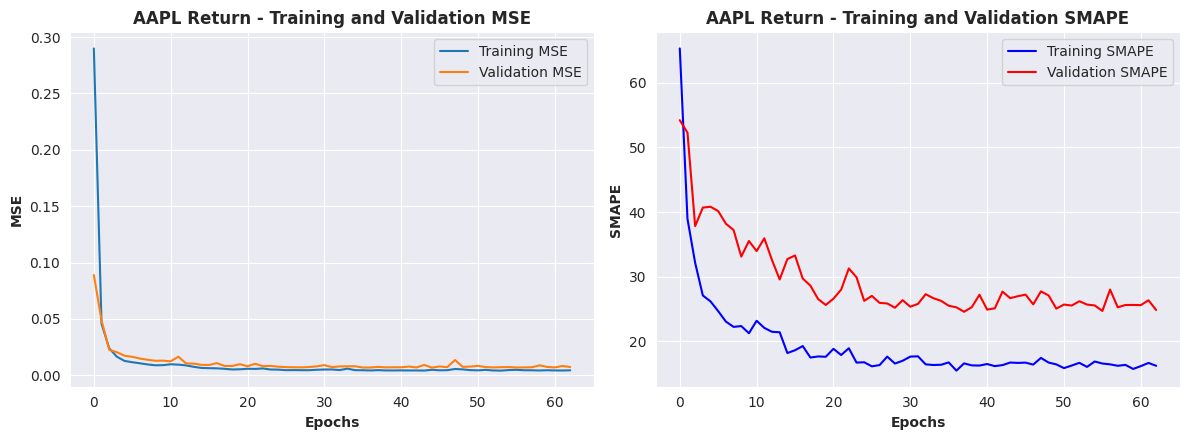

3/3 [==============================] - 0s 5ms/step
0.002140137915391516


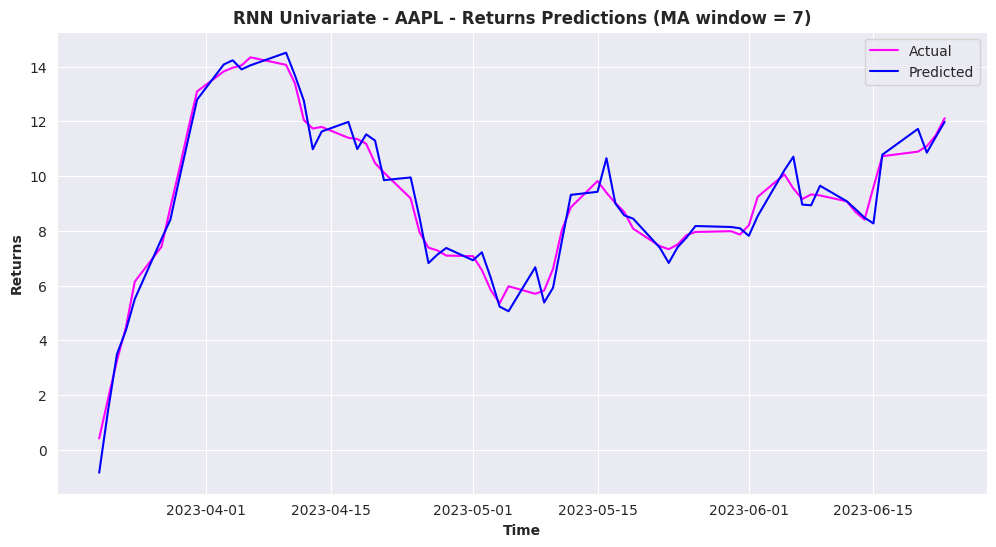

In [ ]:
#@title **[RNN] - AAPL - Best UNIVARIATE model**
# Best Hyperparameters: {'units': 32, 'batch_size': 32, 'epochs': 100, 'patience': 25, 'learning_rate': 0.01}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 32
batch_size = 32
epochs     = 100
patience   = 25
learning_rate = 0.01

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=units, batch_input_shape=(batch_size, 7, 1)))
model.add(Dense(units=1))

# Compile and fit the model
history = compile_and_fit(model=model,
                X_train=AAPL_X_train,
                Y_train=AAPL_Y_train,
                X_val=AAPL_X_val,
                Y_val=AAPL_Y_val,
                file=str('RNN') + '_Univariate/' + str('AAPL'),
                _save_model=True,
                _early_stopping=True,
                _patience=patience,
                _min_delta=1e-5,
                _epochs=epochs,
                _batch_size=batch_size,
                _learning_rate=learning_rate,
                _verbose=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AAPL Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AAPL Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AAPL_predictions = model.predict(AAPL_X_test)
mse = mean_squared_error(AAPL_Y_test, AAPL_predictions)
print(mse)

# Inverse transform AAPL Returns
AAPL_test = (AAPL_Y_test * AAPL_std_MA) + AAPL_mean_MA
AAPL_predictions = (AAPL_predictions * AAPL_std_MA) + AAPL_mean_MA

plt.figure(figsize=(12, 6))
plt.plot(AAPL.index[-len(AAPL_Y_test):].values, AAPL_test, label='Actual', color='magenta')
plt.plot(AAPL.index[-len(AAPL_Y_test):].values, AAPL_predictions, label='Predicted', color='blue')
plt.title('RNN Univariate - AAPL - Returns Predictions (MA window = ' + str(window_size) + ')', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Returns', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (32, 32)                  4352      
                                                                 
 dense_1 (Dense)             (32, 1)                   33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
16/16 [==============================] - ETA: 0s - loss: 0.3405 - smape: 88.8942 
Epoch 1: val_smape improved from inf to 74.87310, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/LSTM_Univariate/AAPL.h5
16/16 [==============================] - 4s 66ms/step - loss: 0.3405 - smape: 88.8942 - val_loss: 0.2025 - val_smape: 74.8731
Epoch 2/250
14/16 [=========================>....] - ETA: 0s - loss: 0.1184 - smape: 56.8698
Ep

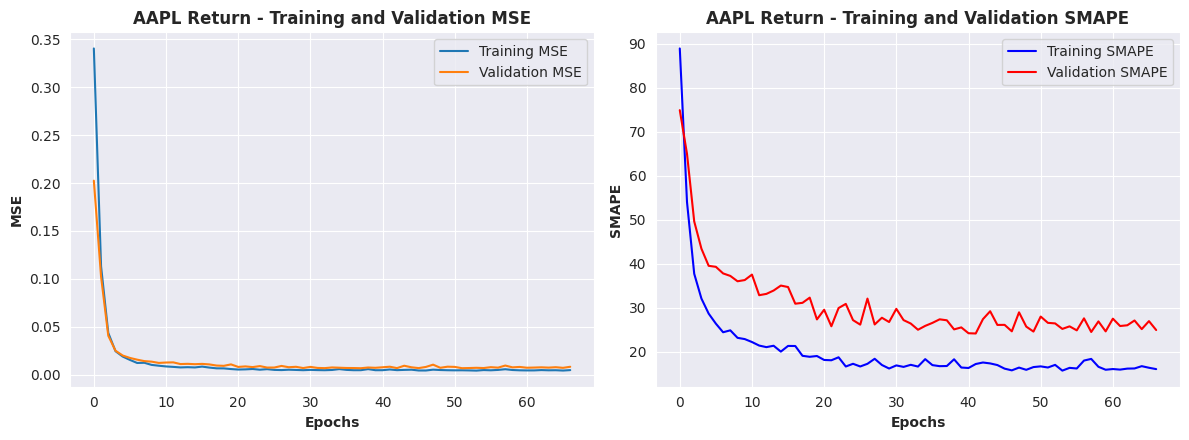

3/3 [==============================] - 1s 4ms/step
0.0019286431881368094


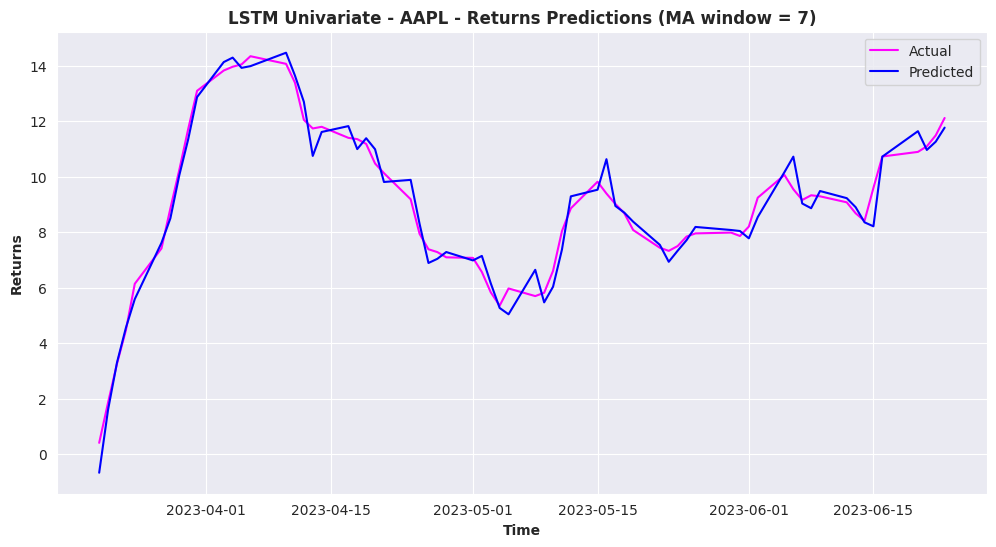

In [ ]:
#@title **[LSTM] - AAPL - Best UNIVARIATE model**
# Best Hyperparameters: {'units': 32, 'batch_size': 32, 'epochs': 250, 'patience': 10, 'learning_rate': 0.01}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 32
batch_size = 32
epochs     = 250
patience   = 25
learning_rate = 0.01

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=units, batch_input_shape=(batch_size, 7, 1)))
model.add(Dense(units=1))

# Compile and fit the model
history = compile_and_fit(model=model,
                X_train=AAPL_X_train,
                Y_train=AAPL_Y_train,
                X_val=AAPL_X_val,
                Y_val=AAPL_Y_val,
                file=str('LSTM') + '_Univariate/' + str('AAPL'),
                _save_model=True,
                _early_stopping=True,
                _patience=patience,
                _min_delta=1e-5,
                _epochs=epochs,
                _batch_size=batch_size,
                _learning_rate=learning_rate,
                _verbose=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AAPL Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AAPL Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AAPL_predictions = model.predict(AAPL_X_test)
mse = mean_squared_error(AAPL_Y_test, AAPL_predictions)
print(mse)

# Inverse transform AAPL Returns
AAPL_test = (AAPL_Y_test * AAPL_std_MA) + AAPL_mean_MA
AAPL_predictions = (AAPL_predictions * AAPL_std_MA) + AAPL_mean_MA

plt.figure(figsize=(12, 6))
plt.plot(AAPL.index[-len(AAPL_Y_test):].values, AAPL_test, label='Actual', color='magenta')
plt.plot(AAPL.index[-len(AAPL_Y_test):].values, AAPL_predictions, label='Predicted', color='blue')
plt.title('LSTM Univariate - AAPL - Returns Predictions (MA window = ' + str(window_size) + ')', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Returns', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
451/474 [===========================>..] - ETA: 0s - loss: 0.0084 - smape: 20.3916
Epoch 1: val_smape improved from inf to 18.61822, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/RNN_Multivariate/AAPL.h5
474/474 [==============================] - 3s 4ms/step - loss: 0.0082 - smape: 19.8695 - val_loss: 0.0057 - val_smape: 18.6182
Epoch 2/100
467/474 [============================>.] - ETA: 0s - loss: 0.0044 - smape: 15.3889
E

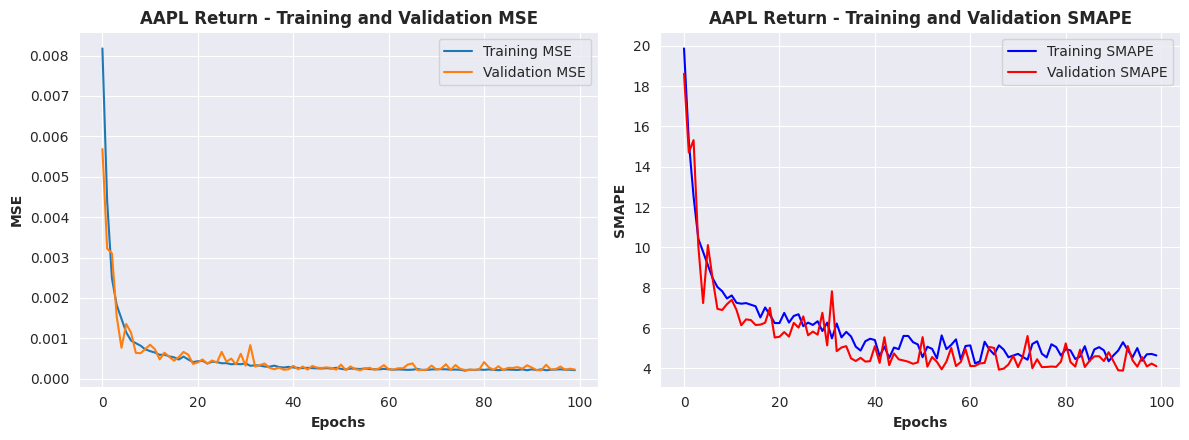

2/2 [==============================] - 0s 5ms/step
8.682047798709688e-05


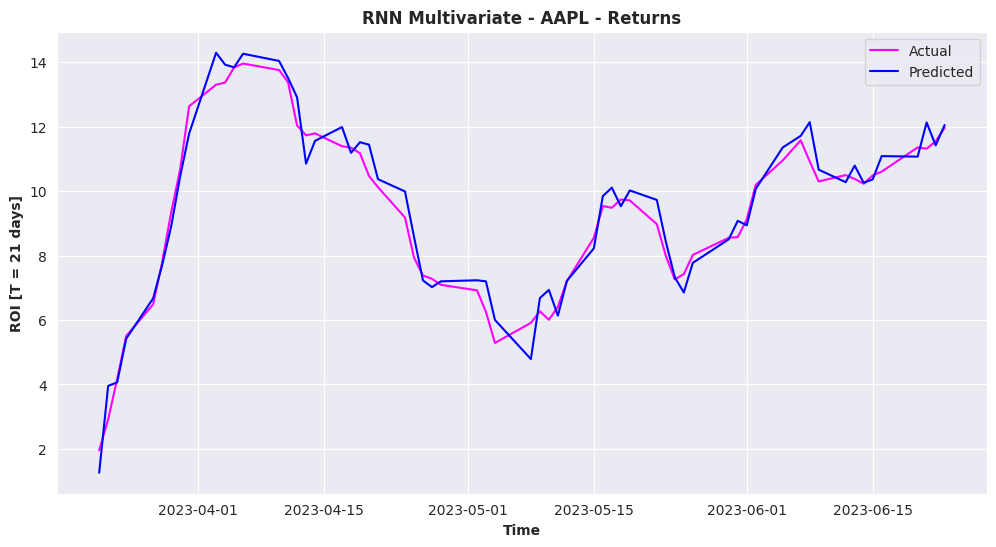

In [ ]:
#@title **[RNN] - AAPL - Best MULTIVARIATE model**
# Best Hyperparameters: {'units': 8, 'batch_size': 1, 'epochs': 100, 'patience': 25, 'learning_rate': 0.001}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 8
batch_size = 1
epochs     = 100
patience   = 25
learning_rate = 0.001

lookback = 7
features = 3

model = Sequential()

model.add(SimpleRNN(units=units,
          input_shape=(lookback, features)))

model.add(Dense(units=1))

history = compile_and_fit(model,
                          X_train=AAPL_SMSG_X_train,
                          Y_train=AAPL_SMSG_Y_train,
                          X_val=AAPL_SMSG_X_val,
                          Y_val=AAPL_SMSG_Y_val,
                          file=str('RNN') + '_Multivariate/' + str('AAPL'),
                          _save_model=True,
                          _early_stopping=True,
                          _patience=patience,
                          _min_delta=1e-5,
                          _epochs=epochs,
                          _batch_size=batch_size,
                          _learning_rate=learning_rate,
                          _verbose=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AAPL Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AAPL Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AAPL_predictions = model.predict(AAPL_SMSG_X_test)
mse = mean_squared_error(AAPL_SMSG_Y_test, AAPL_predictions)
print(mse)

# Plotting AAPL close price predictions
plt.figure(figsize=(12, 6))
plt.plot(AAPL_SMSG.index[-len(AAPL_SMSG_Y_test):].values, AAPL_Return_scaler.inverse_transform(AAPL_SMSG_Y_test.reshape(-1, 1)), label='Actual', color='magenta')
plt.plot(AAPL_SMSG.index[-len(AAPL_SMSG_Y_test):].values, AAPL_Return_scaler.inverse_transform(AAPL_predictions.reshape(-1, 1)), label='Predicted', color='blue')
plt.title('RNN Multivariate - AAPL - Returns', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('ROI [T = ' + str(T) + ' days]', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1280      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
56/60 [===========================>..] - ETA: 0s - loss: 0.0988 - smape: 73.1433
Epoch 1: val_smape improved from inf to 32.61988, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/LSTM_Multivariate/AAPL.h5
60/60 [==============================] - 4s 22ms/step - loss: 0.0940 - smape: 69.2420 - val_loss: 0.0176 - val_smape: 32.6199
Epoch 2/250
53/60 [=========================>....] - ETA: 0s - loss: 0.0152 - smape: 26.1027
E

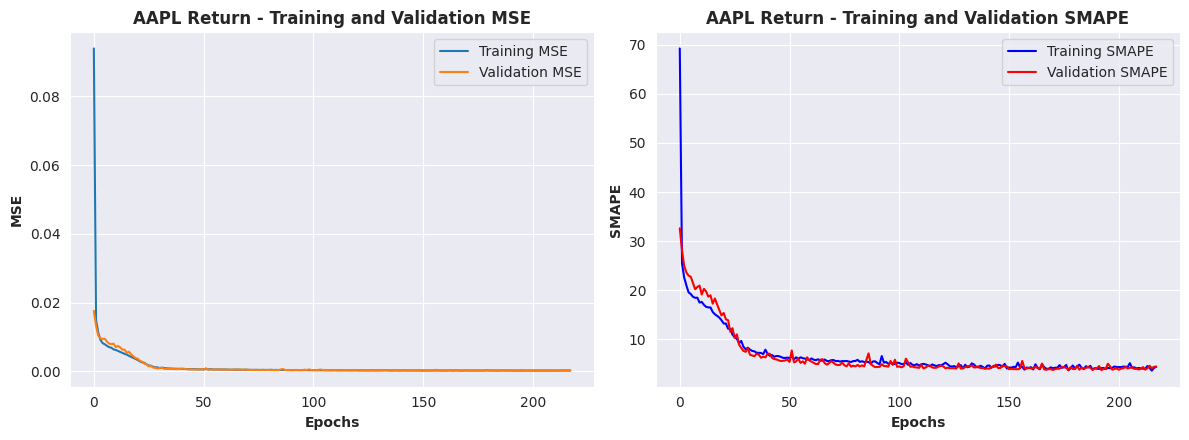

2/2 [==============================] - 0s 6ms/step
9.126548528267124e-05


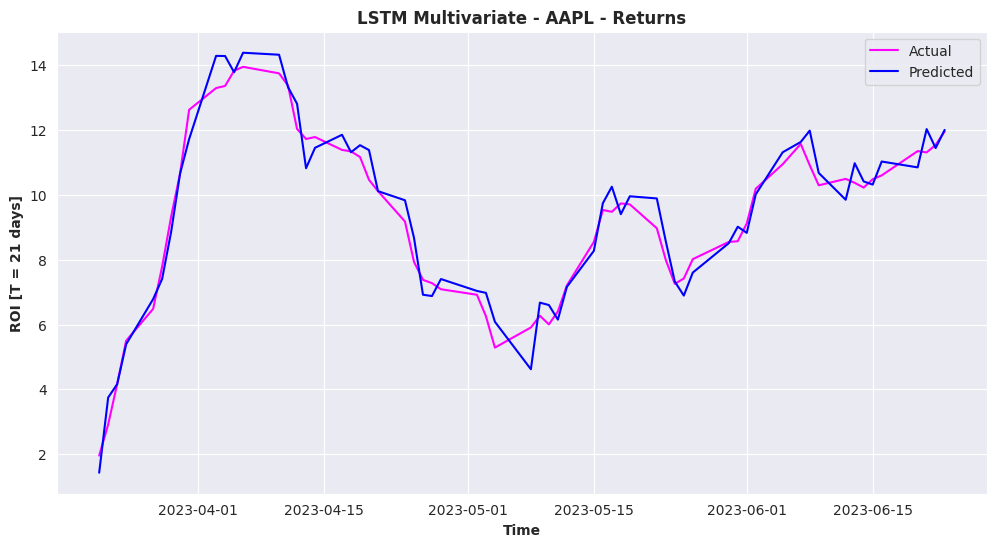

In [ ]:
#@title **[LSTM] - AAPL - Best MULTIVARIATE model**
# Best Hyperparameters: {'units': 16, 'batch_size': 8, 'epochs': 250, 'patience': 25, 'learning_rate': 0.001}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 16
batch_size = 8
epochs     = 250
patience   = 25
learning_rate = 0.001

lookback = 7
features = 3

model = Sequential()

model.add(LSTM(units=units,
          input_shape=(lookback, features)))

model.add(Dense(units=1))

history = compile_and_fit(model,
                          X_train=AAPL_SMSG_X_train,
                          Y_train=AAPL_SMSG_Y_train,
                          X_val=AAPL_SMSG_X_val,
                          Y_val=AAPL_SMSG_Y_val,
                          file=str('LSTM') + '_Multivariate/' + str('AAPL'),
                          _save_model=True,
                          _early_stopping=True,
                          _patience=patience,
                          _min_delta=1e-5,
                          _epochs=epochs,
                          _batch_size=batch_size,
                          _learning_rate=learning_rate,
                          _verbose=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AAPL Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AAPL Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AAPL_predictions = model.predict(AAPL_SMSG_X_test)
mse = mean_squared_error(AAPL_SMSG_Y_test, AAPL_predictions)
print(mse)

# Plotting AAPL close price predictions
plt.figure(figsize=(12, 6))
plt.plot(AAPL_SMSG.index[-len(AAPL_SMSG_Y_test):].values, AAPL_Return_scaler.inverse_transform(AAPL_SMSG_Y_test.reshape(-1, 1)), label='Actual', color='magenta')
plt.plot(AAPL_SMSG.index[-len(AAPL_SMSG_Y_test):].values, AAPL_Return_scaler.inverse_transform(AAPL_predictions.reshape(-1, 1)), label='Predicted', color='blue')
plt.title('LSTM Multivariate - AAPL - Returns', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('ROI [T = ' + str(T) + ' days]', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 8)                    80        
                                                                 
 dense_4 (Dense)             (8, 1)                    9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
55/63 [=========================>....] - ETA: 0s - loss: 0.1826 - smape: 68.2184
Epoch 1: val_smape improved from inf to 29.95295, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/RNN_Univariate/AMZN.h5
63/63 [==============================] - 2s 12ms/step - loss: 0.1628 - smape: 62.9513 - val_loss: 0.0232 - val_smape: 29.9530
Epoch 2/250
56/63 [=========================>....] - ETA: 0s - loss: 0.0433 - smape: 32.6544
Epoch 2: v

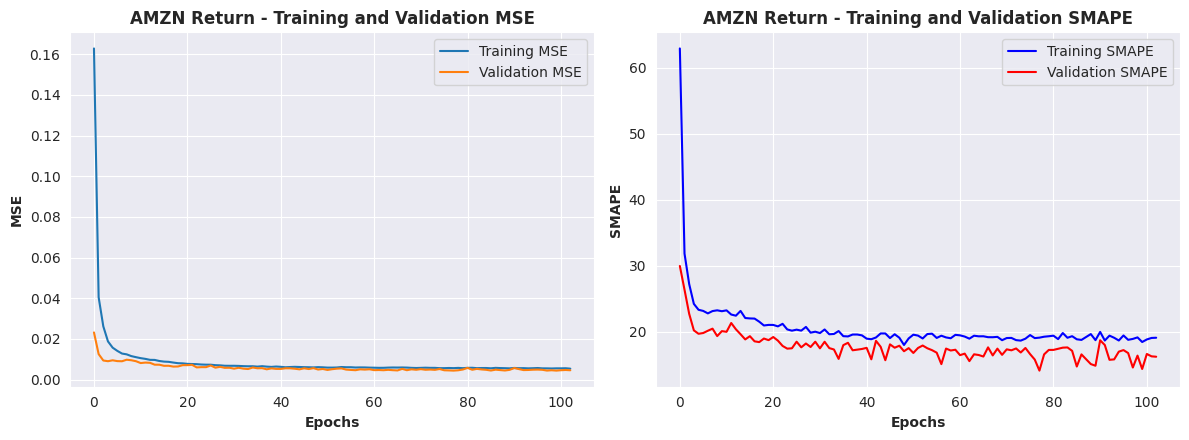

3/3 [==============================] - 0s 6ms/step
0.002268339802370909


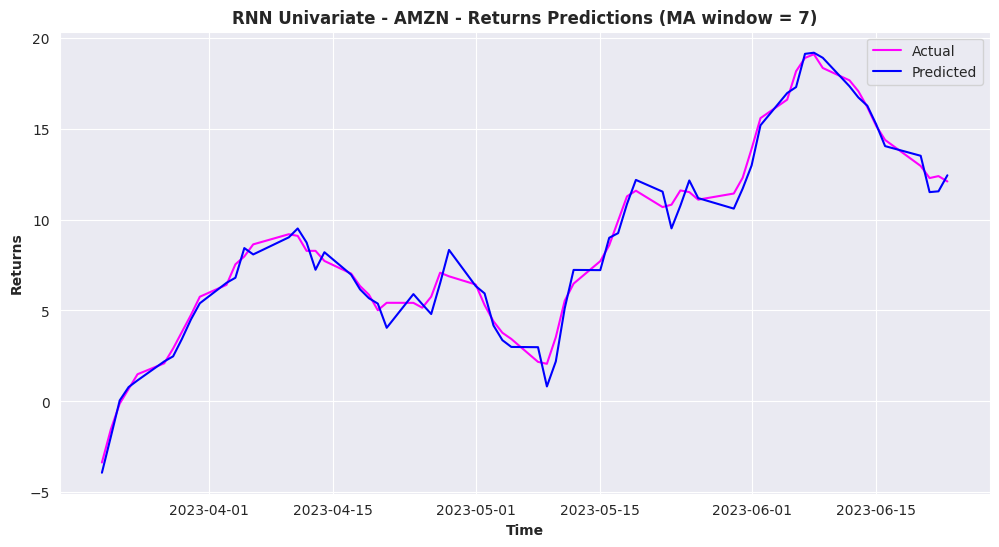

In [ ]:
#@title **[RNN] - AMZN - Best UNIVARIATE model**
# Best Hyperparameters: {'units': 8, 'batch_size': 8, 'epochs': 250, 'patience': 25, 'learning_rate': 0.001}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 8
batch_size = 8
epochs     = 250
patience   = 25
learning_rate = 0.001

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=units, batch_input_shape=(batch_size, 7, 1)))
model.add(Dense(units=1))

# Compile and fit the model
history = compile_and_fit(model=model,
                X_train=AMZN_X_train,
                Y_train=AMZN_Y_train,
                X_val=AMZN_X_val,
                Y_val=AMZN_Y_val,
                file=str('RNN') + '_Univariate/' + str('AMZN'),
                _save_model=True,
                _early_stopping=True,
                _patience=patience,
                _min_delta=1e-5,
                _epochs=epochs,
                _batch_size=batch_size,
                _learning_rate=learning_rate,
                _verbose=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AMZN Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AMZN Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AMZN_predictions = model.predict(AMZN_X_test)
mse = mean_squared_error(AMZN_Y_test, AMZN_predictions)
print(mse)

# Inverse transform AMZN Returns
AMZN_test = (AMZN_Y_test * AMZN_std_MA) + AMZN_mean_MA
AMZN_predictions = (AMZN_predictions * AMZN_std_MA) + AMZN_mean_MA

plt.figure(figsize=(12, 6))
plt.plot(AMZN.index[-len(AMZN_Y_test):].values, AMZN_test, label='Actual', color='magenta')
plt.plot(AMZN.index[-len(AMZN_Y_test):].values, AMZN_predictions, label='Predicted', color='blue')
plt.title('RNN Univariate - AMZN - Returns Predictions (MA window = ' + str(window_size) + ')', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Returns', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (16, 32)                  4352      
                                                                 
 dense_5 (Dense)             (16, 1)                   33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
24/32 [=====================>........] - ETA: 0s - loss: 0.1671 - smape: 69.0237
Epoch 1: val_smape improved from inf to 41.02337, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/LSTM_Univariate/AMZN.h5
32/32 [==============================] - 3s 24ms/step - loss: 0.1384 - smape: 61.9209 - val_loss: 0.0472 - val_smape: 41.0234
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.0381 - smape: 38.6542
Epo

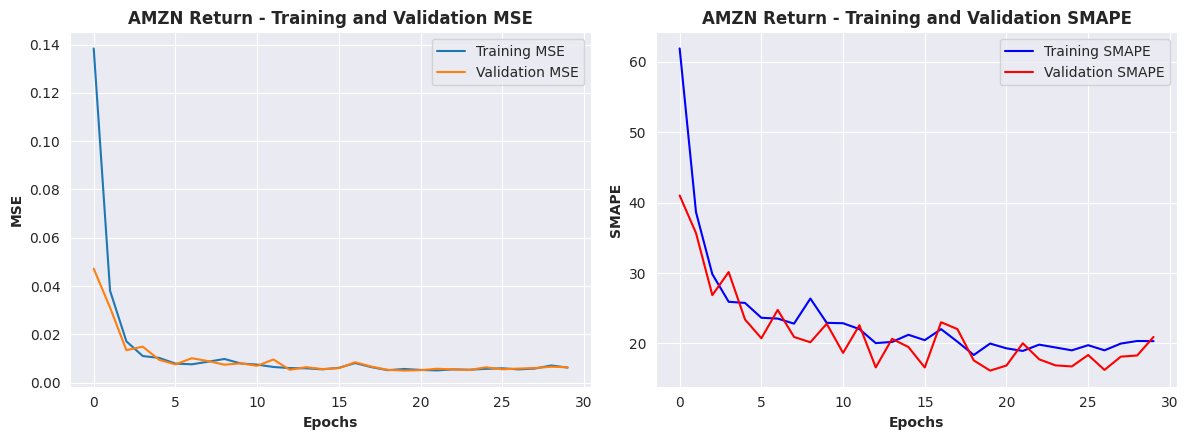

3/3 [==============================] - 0s 5ms/step
0.0021109287124758316


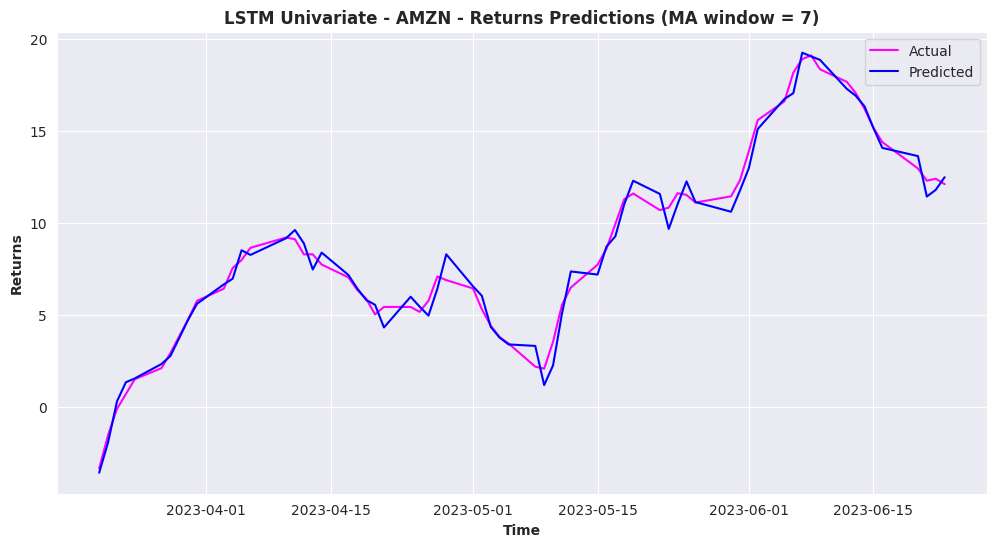

In [ ]:
#@title **[LSTM] - AMZN - Best UNIVARIATE model**
# Best Hyperparameters: {'units': 8, 'batch_size': 16, 'epochs': 250, 'patience': 10, 'learning_rate': 0.01}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 8
batch_size = 16
epochs     = 250
patience   = 10
learning_rate = 0.01

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=units, batch_input_shape=(batch_size, 7, 1)))
model.add(Dense(units=1))

# Compile and fit the model
history = compile_and_fit(model=model,
                X_train=AMZN_X_train,
                Y_train=AMZN_Y_train,
                X_val=AMZN_X_val,
                Y_val=AMZN_Y_val,
                file=str('LSTM') + '_Univariate/' + str('AMZN'),
                _save_model=True,
                _early_stopping=True,
                _patience=patience,
                _min_delta=1e-5,
                _epochs=epochs,
                _batch_size=batch_size,
                _learning_rate=learning_rate,
                _verbose=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AMZN Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AMZN Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AMZN_predictions = model.predict(AMZN_X_test)
mse = mean_squared_error(AMZN_Y_test, AMZN_predictions)
print(mse)

# Inverse transform AMZN Returns
AMZN_test = (AMZN_Y_test * AMZN_std_MA) + AMZN_mean_MA
AMZN_predictions = (AMZN_predictions * AMZN_std_MA) + AMZN_mean_MA

plt.figure(figsize=(12, 6))
plt.plot(AMZN.index[-len(AMZN_Y_test):].values, AMZN_test, label='Actual', color='magenta')
plt.plot(AMZN.index[-len(AMZN_Y_test):].values, AMZN_predictions, label='Predicted', color='blue')
plt.title('LSTM Univariate - AMZN - Returns Predictions (MA window = ' + str(window_size) + ')', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Returns', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 4)                 32        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
122/126 [============================>.] - ETA: 0s - loss: 0.2454 - smape: 75.2054
Epoch 1: val_smape improved from inf to 121.35868, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/RNN_Multivariate/AMZN.h5
126/126 [==============================] - 2s 6ms/step - loss: 0.2395 - smape: 73.7474 - val_loss: 0.6305 - val_smape: 121.3587
Epoch 2/100
106/126 [========================>.....] - ETA: 0s - loss: 0.0823 - smape: 38.2826
E

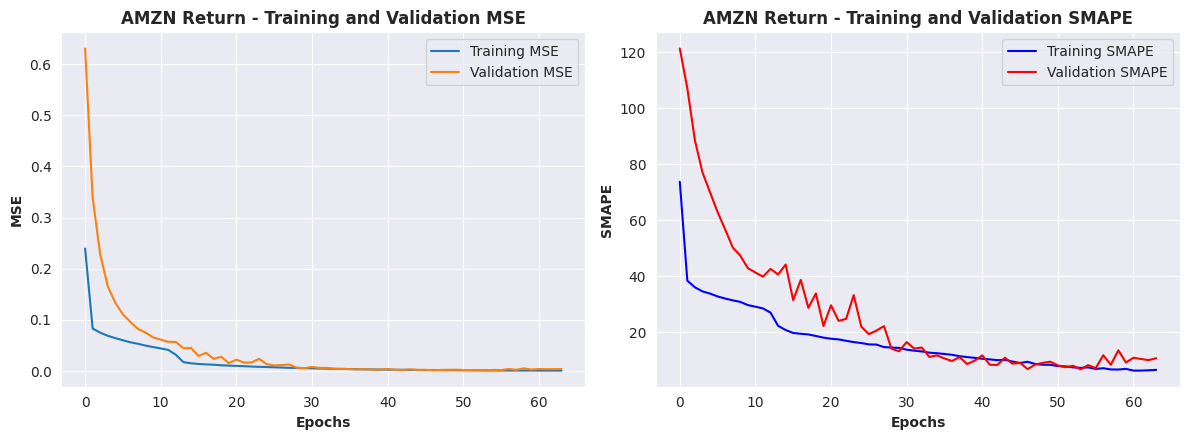

3/3 [==============================] - 0s 4ms/step
0.001743463357421074


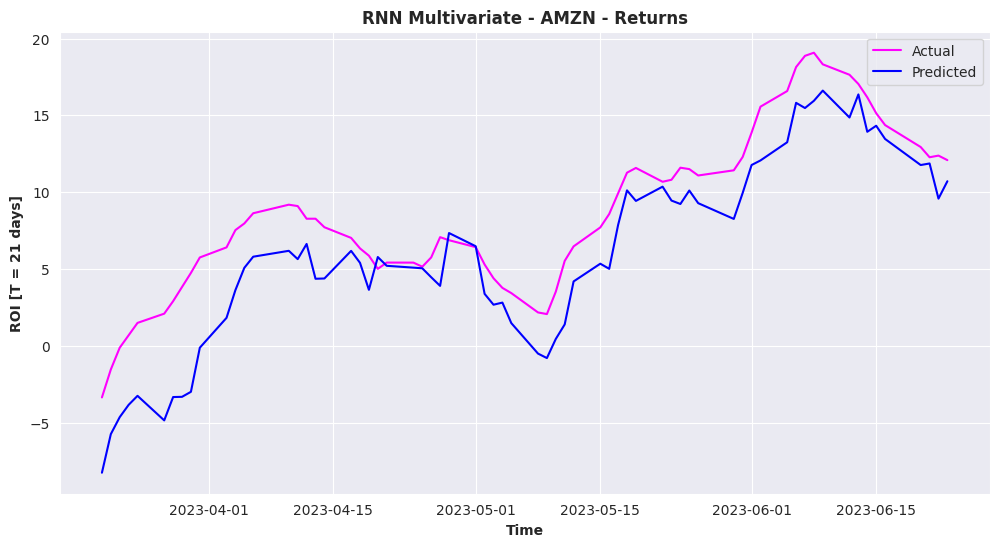

In [ ]:
#@title **[RNN] - AMZN - Best MULTIVARIATE model**
# Best Hyperparameters: {'units': 4, 'batch_size': 4, 'epochs': 100, 'patience': 10, 'learning_rate': 0.001}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 4
batch_size = 4
epochs     = 100
patience   = 10
learning_rate = 0.001

lookback = 7
features = 3

model = Sequential()

model.add(SimpleRNN(units=units,
          input_shape=(lookback, features)))

model.add(Dense(units=1))

history = compile_and_fit(model,
                          X_train=AMZN_BABA_X_train,
                          Y_train=AMZN_BABA_Y_train,
                          X_val=AMZN_BABA_X_val,
                          Y_val=AMZN_BABA_Y_val,
                          file=str('RNN') + '_Multivariate/' + str('AMZN'),
                          _save_model=True,
                          _early_stopping=True,
                          _patience=patience,
                          _min_delta=1e-5,
                          _epochs=epochs,
                          _batch_size=batch_size,
                          _learning_rate=learning_rate,
                          _verbose=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AMZN Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AMZN Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AMZN_predictions = model.predict(AMZN_BABA_X_test)
mse = mean_squared_error(AMZN_BABA_Y_test, AMZN_predictions)
print(mse)

# Plotting AAPL close price predictions
plt.figure(figsize=(12, 6))
plt.plot(AMZN_BABA.index[-len(AMZN_BABA_Y_test):].values, AMZN_Return_scaler.inverse_transform(AMZN_BABA_Y_test.reshape(-1, 1)), label='Actual', color='magenta')
plt.plot(AMZN_BABA.index[-len(AMZN_BABA_Y_test):].values, AMZN_Return_scaler.inverse_transform(AMZN_predictions.reshape(-1, 1)), label='Predicted', color='blue')
plt.title('RNN Multivariate - AMZN - Returns', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('ROI [T = ' + str(T) + ' days]', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4)                 128       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
13/16 [=======================>......] - ETA: 0s - loss: 0.0882 - smape: 56.1336  
Epoch 1: val_smape improved from inf to 28.86769, saving model to /content/drive/MyDrive/_Casu_Deiana/Models/LSTM_Multivariate/AMZN.h5
16/16 [==============================] - 3s 42ms/step - loss: 0.0792 - smape: 50.4951 - val_loss: 0.0378 - val_smape: 28.8677
Epoch 2/250
14/16 [=========================>....] - ETA: 0s - loss: 0.0270 - smape: 25.7695
Epo

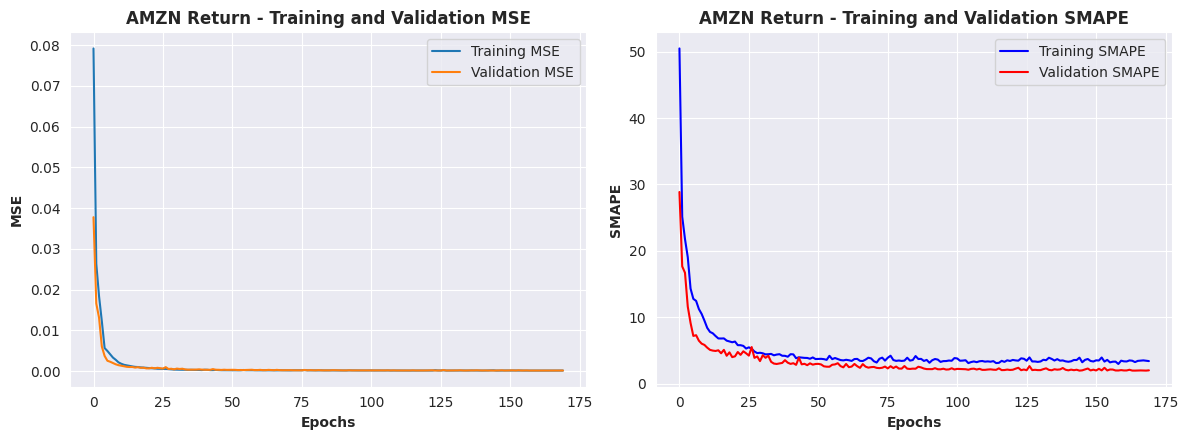

3/3 [==============================] - 0s 5ms/step
6.793698015624686e-05


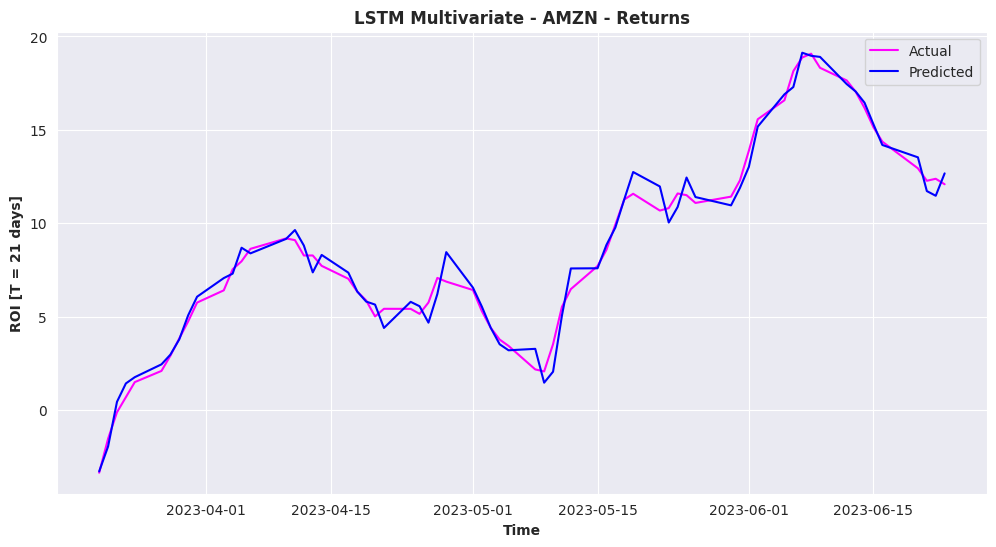

In [ ]:
#@title **[LSTM] - AMZN - Best MULTIVARIATE model**
# Best Hyperparameters: {'units': 4, 'batch_size': 32, 'epochs': 250, 'patience': 25, 'learning_rate': 0.01}

# For reproducibility
np.random.seed(24)
tf.random.set_seed(24)

# Best hyperparameters
units      = 4
batch_size = 32
epochs     = 250
patience   = 25
learning_rate = 0.01

lookback = 7
features = 3

model = Sequential()

model.add(LSTM(units=units,
          input_shape=(lookback, features)))

model.add(Dense(units=1))

history = compile_and_fit(model,
                          X_train=AMZN_BABA_X_train,
                          Y_train=AMZN_BABA_Y_train,
                          X_val=AMZN_BABA_X_val,
                          Y_val=AMZN_BABA_Y_val,
                          file=str('LSTM') + '_Multivariate/' + str('AMZN'),
                          _save_model=True,
                          _early_stopping=True,
                          _patience=patience,
                          _min_delta=1e-5,
                          _epochs=epochs,
                          _batch_size=batch_size,
                          _learning_rate=learning_rate,
                          _verbose=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# Plot training loss and validation loss
ax1.plot(history.history['loss'], label='Training MSE')
ax1.plot(history.history['val_loss'], label='Validation MSE')
ax1.set_title('AMZN Return - Training and Validation MSE', fontweight='bold')
ax1.set_xlabel('Epochs', fontweight='bold')
ax1.set_ylabel('MSE', fontweight='bold')
ax1.legend()

# Plot training loss and validation smape
ax2.plot(history.history['smape'], label='Training SMAPE', color='blue')
ax2.plot(history.history['val_smape'], label='Validation SMAPE', color='red')
ax2.set_title('AMZN Return - Training and Validation SMAPE', fontweight='bold')
ax2.set_xlabel('Epochs', fontweight='bold')
ax2.set_ylabel('SMAPE', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

AMZN_predictions = model.predict(AMZN_BABA_X_test)
mse = mean_squared_error(AMZN_BABA_Y_test, AMZN_predictions)
print(mse)

# Plotting AAPL close price predictions
plt.figure(figsize=(12, 6))
plt.plot(AMZN_BABA.index[-len(AMZN_BABA_Y_test):].values, AMZN_Return_scaler.inverse_transform(AMZN_BABA_Y_test.reshape(-1, 1)), label='Actual', color='magenta')
plt.plot(AMZN_BABA.index[-len(AMZN_BABA_Y_test):].values, AMZN_Return_scaler.inverse_transform(AMZN_predictions.reshape(-1, 1)), label='Predicted', color='blue')
plt.title('LSTM Multivariate - AMZN - Returns', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('ROI [T = ' + str(T) + ' days]', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()